In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#df = pd.read_csv("Datasets/polluted/FINAL_DF.csv")
df = pd.read_csv("Datasets/Final_DFcsv")

#subsetting the data
left_df = df[df['political_leaning'] == 1]
center_df = df[df['political_leaning'] == 0]
right_df = df[df['political_leaning'] == 2]

print(f"Left subset size: {len(left_df)}")
print(f"Center subset size: {len(center_df)}")
print(f"Right subset size: {len(right_df)}")


Left subset size: 14328
Center subset size: 24639
Right subset size: 17110



Spearman Correlation Results with Political Leaning:
                     Spearman Correlation        p-value
aggression                      -0.102134  6.815337e-130
flesch_reading_ease              0.065146   8.400980e-54
lda_dominant_topic               0.061488   4.096206e-48
gunning_fog_index               -0.041736   4.720217e-23


C:\Users\20220870\AppData\Local\Temp\ipykernel_8976\509805241.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y=correlation_df['Spearman Correlation'], palette='Blues')


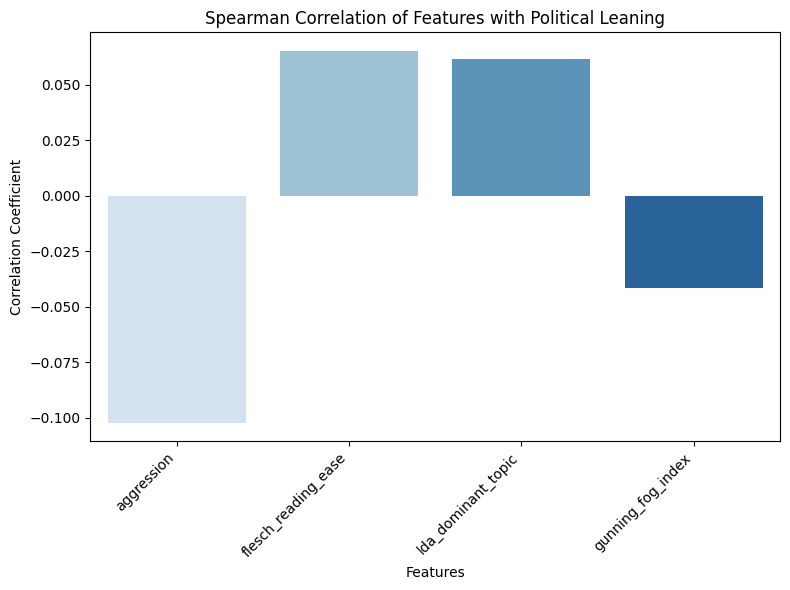


Correlation Matrix for Left-Leaning Posts:
                     lda_dominant_topic  gunning_fog_index  \
lda_dominant_topic             1.000000          -0.078325   
gunning_fog_index             -0.078325           1.000000   
flesch_reading_ease            0.271229          -0.825968   
aggression                    -0.156011           0.073170   

                     flesch_reading_ease  aggression  
lda_dominant_topic              0.271229   -0.156011  
gunning_fog_index              -0.825968    0.073170  
flesch_reading_ease             1.000000   -0.148254  
aggression                     -0.148254    1.000000  


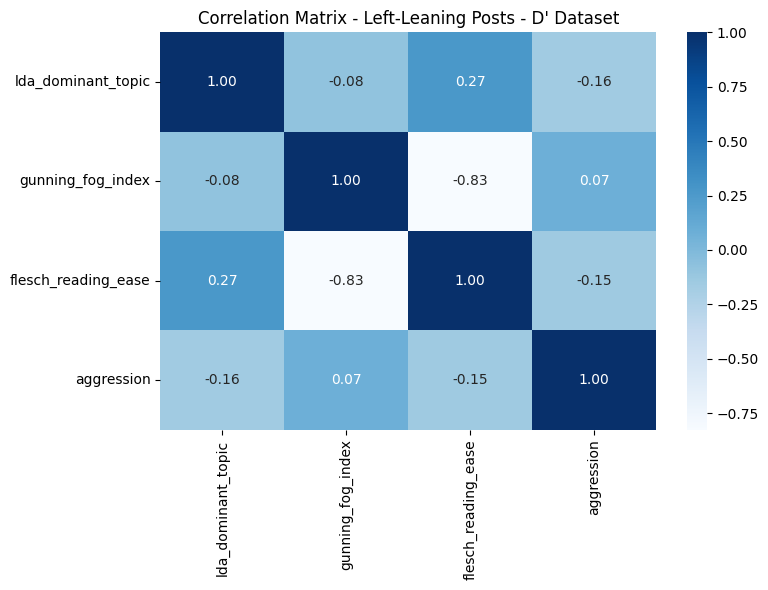


Correlation Matrix for Center-Leaning Posts:
                     lda_dominant_topic  gunning_fog_index  \
lda_dominant_topic             1.000000           -0.06248   
gunning_fog_index             -0.062480            1.00000   
flesch_reading_ease            0.364696           -0.77755   
aggression                    -0.380018            0.07611   

                     flesch_reading_ease  aggression  
lda_dominant_topic              0.364696   -0.380018  
gunning_fog_index              -0.777550    0.076110  
flesch_reading_ease             1.000000   -0.231822  
aggression                     -0.231822    1.000000  


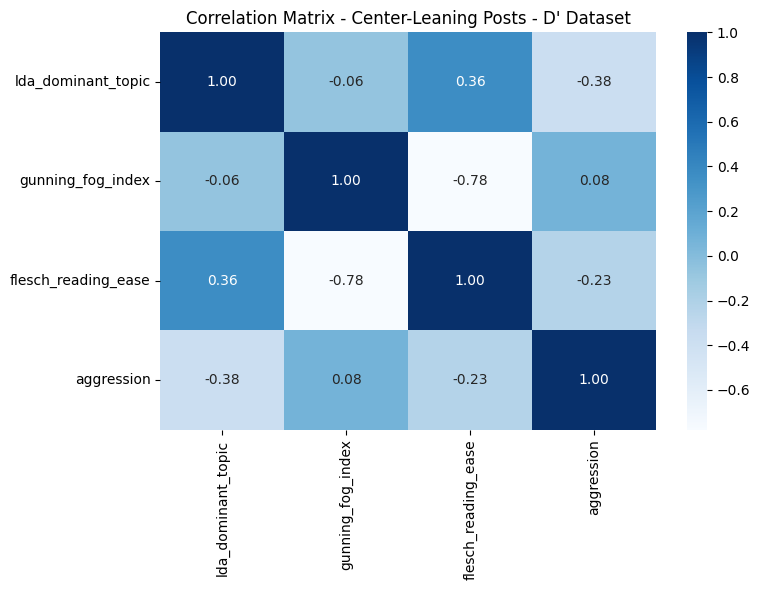


Correlation Matrix for Right-Leaning Posts:
                     lda_dominant_topic  gunning_fog_index  \
lda_dominant_topic             1.000000          -0.020986   
gunning_fog_index             -0.020986           1.000000   
flesch_reading_ease            0.258896          -0.815252   
aggression                    -0.118443           0.069643   

                     flesch_reading_ease  aggression  
lda_dominant_topic              0.258896   -0.118443  
gunning_fog_index              -0.815252    0.069643  
flesch_reading_ease             1.000000   -0.098112  
aggression                     -0.098112    1.000000  


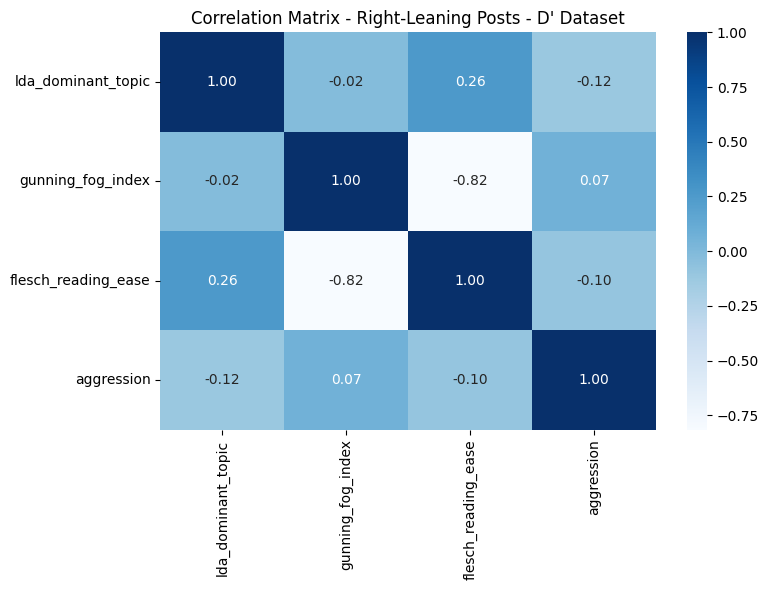

In [18]:
important_features = ['lda_dominant_topic', 'gunning_fog_index', 
                      'flesch_reading_ease', 'aggression']

# Add 'political_leaning' to the features for correlation analysis
features_to_analyze = important_features + ['political_leaning']

#compute Spearman's correlation for the entire dataset
correlation_results = {}
for feature in important_features:
    corr, p_value = spearmanr(df['political_leaning'], df[feature])
    correlation_results[feature] = {'Spearman Correlation': corr, 'p-value': p_value}

correlation_df = pd.DataFrame(correlation_results).T
correlation_df = correlation_df.sort_values(by='Spearman Correlation', key=abs, ascending=False)
print("\nSpearman Correlation Results with Political Leaning:")
print(correlation_df)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_df.index, y=correlation_df['Spearman Correlation'], palette='Blues')
plt.title("Spearman Correlation of Features with Political Leaning")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for leaning, subset in zip(['Left', 'Center', 'Right'], [left_df, center_df, right_df]):
    print(f"\nCorrelation Matrix for {leaning}-Leaning Posts:")
    subset_corr = subset[important_features].corr(method='spearman')
    print(subset_corr)
    plt.figure(figsize=(8, 6))
    sns.heatmap(subset_corr, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f"Correlation Matrix - {leaning}-Leaning Posts - D' Dataset")
    plt.tight_layout()
    plt.show()
